In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6230,9962-BFPDU,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
6497,4062-HBMOS,Male,0,No,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.05,5364.8,No
6652,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689,No
2841,9743-DQKQW,Male,0,No,No,3,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,25.10,79.8,No
6021,3752-CQSJI,Female,0,Yes,Yes,13,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,254.5,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values #find out why total charges is object instead of int

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
#pd.to_numeric(df.TotalCharges) here found that some cells are empty

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull() #ignore error

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] #serve as index False (not empty)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488]['TotalCharges']

' '

In [11]:
df1 = df[df.TotalCharges!=' '] #drop those that are empty
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\kwanm\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df1.TotalCharges.dtypes

dtype('float64')

In [14]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


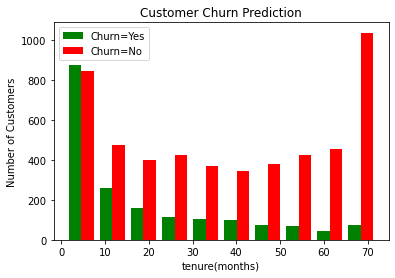

In [15]:
#churn means leave or not
#tenure menas time of staying
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure(months)')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

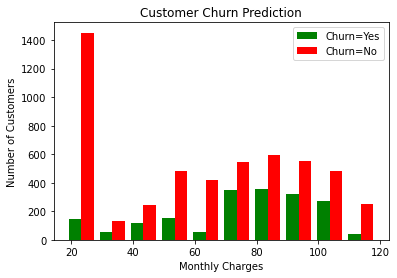

In [16]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [17]:
def print_unique_col_values(df):
    for col in df:
        if df[col].dtypes=='object':
            print(f'{col}: {df[col].unique()}')

In [18]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\kwanm\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_cols:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\kwanm\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)

In [24]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [25]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5625,0,0,0,1,22,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
5541,0,0,0,0,61,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3986,1,0,1,0,66,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,1
1674,0,0,1,1,23,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3561,1,0,0,0,26,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [27]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [28]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

df2[cols_to_scale] = sc.fit_transform(df2[cols_to_scale])

In [29]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2991,0,1,1,0,0.507042,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4175,1,0,1,1,0.845070,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1804,0,0,1,1,0.464789,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5874,0,0,0,0,0.126761,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2458,1,1,1,0,0.690141,1,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0


In [30]:
#all the above is to convert all data into int

In [31]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [33]:
len(x_train.columns)

26

In [34]:
with tf.device('/CPU:0'):
    model = keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation='relu'), #only first layer need to know input shape
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 544us/step - loss: 0.5980 - accuracy: 0.6570
Epoch 2/100
176/176 [==============================] - 0s 520us/step - loss: 0.4248 - accuracy: 0.8030
Epoch 3/100
176/176 [==============================] - 0s 516us/step - loss: 0.4228 - accuracy: 0.7954
Epoch 4/100
176/176 [==============================] - 0s 557us/step - loss: 0.4186 - accuracy: 0.8026
Epoch 5/100
176/176 [==============================] - 0s 534us/step - loss: 0.4285 - accuracy: 0.7898
Epoch 6/100
176/176 [==============================] - 0s 544us/step - loss: 0.4205 - accuracy: 0.8055
Epoch 7/100
176/176 [==============================] - 0s 520us/step - loss: 0.4104 - accuracy: 0.8106
Epoch 8/100
176/176 [==============================] - 0s 542us/step - loss: 0.4089 - accuracy: 0.8058
Epoch 9/100
176/176 [==============================] - 0s 527us/step - loss: 0.3989 - accuracy: 0.8161
Epoch 10/100
176/176 [==============================] - 0s 548us/step - l

176/176 [==============================] - 0s 539us/step - loss: 0.3548 - accuracy: 0.8383
Epoch 80/100
176/176 [==============================] - 0s 549us/step - loss: 0.3631 - accuracy: 0.8302
Epoch 81/100
176/176 [==============================] - 0s 532us/step - loss: 0.3606 - accuracy: 0.8397
Epoch 82/100
176/176 [==============================] - 0s 579us/step - loss: 0.3807 - accuracy: 0.8198
Epoch 83/100
176/176 [==============================] - 0s 601us/step - loss: 0.3627 - accuracy: 0.8311
Epoch 84/100
176/176 [==============================] - 0s 727us/step - loss: 0.3744 - accuracy: 0.8189
Epoch 85/100
176/176 [==============================] - 0s 501us/step - loss: 0.3863 - accuracy: 0.8151
Epoch 86/100
176/176 [==============================] - 0s 499us/step - loss: 0.3770 - accuracy: 0.8236
Epoch 87/100
176/176 [==============================] - 0s 508us/step - loss: 0.3742 - accuracy: 0.8176
Epoch 88/100
176/176 [==============================] - 0s 502us/step - loss:

In [35]:
with tf.device('/CPU:0'):
    model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 508us/step - loss: 0.4650 - accuracy: 0.7811


In [36]:
with tf.device('/CPU:0'):
    yp = model.predict(x_test)
yp[:5]

array([[0.1652222 ],
       [0.4300083 ],
       [0.00100267],
       [0.77958965],
       [0.36831605]], dtype=float32)

In [37]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [38]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:5]

[0, 0, 0, 1, 0]

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.51      0.57       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

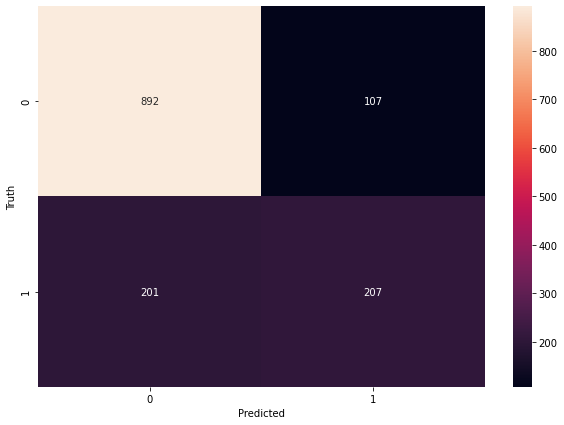

In [40]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
accuracy = round((893+203)/(893+203+106+205),2)
accuracy

0.78

In [42]:
#precision = TP/(TP+FP)
#recall = TP/(TP+FN)

In [43]:
def ANN(x_train,y_train,x_test,y_test,loss,weight):
    model = keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation='relu'), #only first layer need to know input shape
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss=loss,
                 metrics=['accuracy'])
    if weight == -1:
        model.fit(x_train,y_train,epochs=100)
    else:
        model.fit(x_train,y_train,epochs=100,class_weight=weight)
        
    print(model.evaluate(x_test,y_test))
    
    y_pred = np.round(model.predict(x_test))
    
    print('Classification Report: \n', classification_report(y_test,y_pred))
    
    return(y_pred)

In [44]:
with tf.device('/CPU:0'):
    y_pred = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 0s 536us/step - loss: 0.5933 - accuracy: 0.6562
Epoch 2/100
176/176 [==============================] - 0s 519us/step - loss: 0.4277 - accuracy: 0.7993
Epoch 3/100
176/176 [==============================] - 0s 510us/step - loss: 0.4093 - accuracy: 0.8154
Epoch 4/100
176/176 [==============================] - 0s 498us/step - loss: 0.4169 - accuracy: 0.8001
Epoch 5/100
176/176 [==============================] - 0s 554us/step - loss: 0.4185 - accuracy: 0.8078
Epoch 6/100
176/176 [==============================] - 0s 600us/step - loss: 0.4101 - accuracy: 0.8109
Epoch 7/100
176/176 [==============================] - 0s 627us/step - loss: 0.4104 - accuracy: 0.8087
Epoch 8/100
176/176 [==============================] - 0s 536us/step - loss: 0.4227 - accuracy: 0.7959
Epoch 9/100
176/176 [==============================] - 0s 494us/step - loss: 0.4096 - accuracy: 0.8065
Epoch 10/100
176/176 [==============================] - 0s 487us/step - l

176/176 [==============================] - 0s 560us/step - loss: 0.3658 - accuracy: 0.8329
Epoch 80/100
176/176 [==============================] - 0s 580us/step - loss: 0.3567 - accuracy: 0.8365
Epoch 81/100
176/176 [==============================] - 0s 562us/step - loss: 0.3753 - accuracy: 0.8278
Epoch 82/100
176/176 [==============================] - 0s 573us/step - loss: 0.3706 - accuracy: 0.8254
Epoch 83/100
176/176 [==============================] - 0s 571us/step - loss: 0.3714 - accuracy: 0.8305
Epoch 84/100
176/176 [==============================] - 0s 612us/step - loss: 0.3745 - accuracy: 0.8285
Epoch 85/100
176/176 [==============================] - 0s 575us/step - loss: 0.3729 - accuracy: 0.8282
Epoch 86/100
176/176 [==============================] - 0s 562us/step - loss: 0.3506 - accuracy: 0.8392
Epoch 87/100
176/176 [==============================] - 0s 549us/step - loss: 0.3783 - accuracy: 0.8233
Epoch 88/100
176/176 [==============================] - 0s 608us/step - loss:

# Undersampling 

In [45]:
#class count
count_class_0, count_class_1 = df1.Churn.value_counts()

#divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [46]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [47]:
count_class_0, count_class_1

(5163, 1869)

In [48]:
df_class_0_under = df_class_0.sample(count_class_1) #undersample the larger one

df_test_under = pd.concat([df_class_0_under, df_class_1],axis=0)
df_test_under.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6741,0,0,0,0,0.154930,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1804,0,0,1,1,0.464789,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1662,1,0,0,0,0.056338,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2784,0,0,0,1,0.042254,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
317,0,0,1,1,0.521127,1,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0


In [49]:
df_test_under.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [50]:
x_under = df_test_under.drop('Churn',axis='columns')
y_under = df_test_under['Churn']
x_train_under,x_test_under,y_train_under,y_test_under = train_test_split(x_under,y_under,test_size=0.2,random_state=15,stratify=y_under)#'stratify' make sure hv balanced sample

In [51]:
with tf.device('/CPU:0'):
    y_pred_under = ANN(x_train_under,y_train_under,x_test_under,y_test_under,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 607us/step - loss: 0.6781 - accuracy: 0.5502
Epoch 2/100
94/94 [==============================] - 0s 607us/step - loss: 0.5759 - accuracy: 0.7235
Epoch 3/100
94/94 [==============================] - 0s 693us/step - loss: 0.5008 - accuracy: 0.7598
Epoch 4/100
94/94 [==============================] - 0s 633us/step - loss: 0.5007 - accuracy: 0.7630
Epoch 5/100
94/94 [==============================] - 0s 676us/step - loss: 0.4755 - accuracy: 0.77430s - loss: 0.4724 - accuracy: 0.77
Epoch 6/100
94/94 [==============================] - 0s 686us/step - loss: 0.4915 - accuracy: 0.7637
Epoch 7/100
94/94 [==============================] - 0s 676us/step - loss: 0.4954 - accuracy: 0.7590
Epoch 8/100
94/94 [==============================] - 0s 654us/step - loss: 0.4954 - accuracy: 0.7588
Epoch 9/100
94/94 [==============================] - 0s 654us/step - loss: 0.4807 - accuracy: 0.7734
Epoch 10/100
94/94 [==============================] - 0s 

94/94 [==============================] - 0s 582us/step - loss: 0.4239 - accuracy: 0.8085
Epoch 82/100
94/94 [==============================] - 0s 536us/step - loss: 0.4122 - accuracy: 0.8077
Epoch 83/100
94/94 [==============================] - 0s 556us/step - loss: 0.4153 - accuracy: 0.8081
Epoch 84/100
94/94 [==============================] - 0s 515us/step - loss: 0.4107 - accuracy: 0.8132
Epoch 85/100
94/94 [==============================] - 0s 516us/step - loss: 0.4179 - accuracy: 0.8003
Epoch 86/100
94/94 [==============================] - 0s 519us/step - loss: 0.4168 - accuracy: 0.8035
Epoch 87/100
94/94 [==============================] - 0s 764us/step - loss: 0.4071 - accuracy: 0.8150
Epoch 88/100
94/94 [==============================] - 0s 512us/step - loss: 0.4153 - accuracy: 0.8068
Epoch 89/100
94/94 [==============================] - 0s 552us/step - loss: 0.4128 - accuracy: 0.8094
Epoch 90/100
94/94 [==============================] - 0s 483us/step - loss: 0.4048 - accuracy: 

# Oversampling 

In [52]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)#oversample the smaller one

df_test_over = pd.concat([df_class_0, df_class_1_over],axis=0)
df_test_over.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5870,1,0,1,1,0.056338,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3907,1,0,0,0,0.253521,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
5884,1,1,1,0,0.633803,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
397,0,0,0,0,0.464789,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3830,1,0,1,0,0.042254,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [53]:
x_over = df_test_over.drop('Churn',axis='columns')
y_over = df_test_over['Churn']
x_train_over,x_test_over,y_train_over,y_test_over = train_test_split(x_over,y_over,test_size=0.2,random_state=15,stratify=y_over)

In [54]:
y_train_over.value_counts(),y_test_over.value_counts()

(1    4130
 0    4130
 Name: Churn, dtype: int64,
 1    1033
 0    1033
 Name: Churn, dtype: int64)

In [55]:
with tf.device('/CPU:0'):
    y_pred_over = ANN(x_train_over,y_train_over,x_test_over,y_test_over,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 0s 517us/step - loss: 0.5943 - accuracy: 0.6914
Epoch 2/100
259/259 [==============================] - 0s 511us/step - loss: 0.4951 - accuracy: 0.7561
Epoch 3/100
259/259 [==============================] - 0s 531us/step - loss: 0.4902 - accuracy: 0.7653
Epoch 4/100
259/259 [==============================] - 0s 552us/step - loss: 0.4883 - accuracy: 0.7682
Epoch 5/100
259/259 [==============================] - 0s 519us/step - loss: 0.4846 - accuracy: 0.7647
Epoch 6/100
259/259 [==============================] - 0s 568us/step - loss: 0.4858 - accuracy: 0.7594
Epoch 7/100
259/259 [==============================] - 0s 525us/step - loss: 0.4732 - accuracy: 0.7703
Epoch 8/100
259/259 [==============================] - 0s 539us/step - loss: 0.4691 - accuracy: 0.7809
Epoch 9/100
259/259 [==============================] - 0s 533us/step - loss: 0.4751 - accuracy: 0.7770
Epoch 10/100
259/259 [==============================] - 0s 519us/step - l

259/259 [==============================] - 0s 531us/step - loss: 0.4047 - accuracy: 0.8096
Epoch 80/100
259/259 [==============================] - 0s 543us/step - loss: 0.4170 - accuracy: 0.8125
Epoch 81/100
259/259 [==============================] - 0s 560us/step - loss: 0.4021 - accuracy: 0.8100
Epoch 82/100
259/259 [==============================] - 0s 535us/step - loss: 0.4027 - accuracy: 0.8094
Epoch 83/100
259/259 [==============================] - 0s 506us/step - loss: 0.4088 - accuracy: 0.8132
Epoch 84/100
259/259 [==============================] - 0s 523us/step - loss: 0.4001 - accuracy: 0.8183
Epoch 85/100
259/259 [==============================] - 0s 568us/step - loss: 0.4050 - accuracy: 0.8121
Epoch 86/100
259/259 [==============================] - 0s 604us/step - loss: 0.4009 - accuracy: 0.8182
Epoch 87/100
259/259 [==============================] - 0s 533us/step - loss: 0.4149 - accuracy: 0.8078
Epoch 88/100
259/259 [==============================] - 0s 528us/step - loss:

### SMOTE  #Synthetic Minority Oversampling Technique

In [56]:
x_smote = df2.drop('Churn',axis='columns')
y_smote = df2['Churn']

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [64]:
x_sm,y_sm = smote.fit_resample(x_smote,y_smote)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [65]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm = train_test_split(x_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [66]:
with tf.device('/CPU:0'):
    y_pred_sm = ANN(x_train_sm,y_train_sm,x_test_sm,y_test_sm,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 0s 529us/step - loss: 0.6143 - accuracy: 0.6486
Epoch 2/100
259/259 [==============================] - 0s 543us/step - loss: 0.4691 - accuracy: 0.7831
Epoch 3/100
259/259 [==============================] - 0s 540us/step - loss: 0.4726 - accuracy: 0.7745
Epoch 4/100
259/259 [==============================] - 0s 505us/step - loss: 0.4585 - accuracy: 0.7857
Epoch 5/100
259/259 [==============================] - ETA: 0s - loss: 0.4458 - accuracy: 0.78 - 0s 546us/step - loss: 0.4467 - accuracy: 0.7888
Epoch 6/100
259/259 [==============================] - 0s 574us/step - loss: 0.4530 - accuracy: 0.7847
Epoch 7/100
259/259 [==============================] - 0s 526us/step - loss: 0.4484 - accuracy: 0.7911
Epoch 8/100
259/259 [==============================] - 0s 591us/step - loss: 0.4327 - accuracy: 0.8012
Epoch 9/100
259/259 [==============================] - 0s 543us/step - loss: 0.4262 - accuracy: 0.8004
Epoch 10/100
259/259 [=========

259/259 [==============================] - 0s 522us/step - loss: 0.3529 - accuracy: 0.8452
Epoch 80/100
259/259 [==============================] - 0s 531us/step - loss: 0.3580 - accuracy: 0.8445
Epoch 81/100
259/259 [==============================] - 0s 526us/step - loss: 0.3550 - accuracy: 0.8483
Epoch 82/100
259/259 [==============================] - 0s 513us/step - loss: 0.3509 - accuracy: 0.8485
Epoch 83/100
259/259 [==============================] - 0s 539us/step - loss: 0.3399 - accuracy: 0.8543
Epoch 84/100
259/259 [==============================] - 0s 599us/step - loss: 0.3489 - accuracy: 0.8455
Epoch 85/100
259/259 [==============================] - 0s 517us/step - loss: 0.3374 - accuracy: 0.8543
Epoch 86/100
259/259 [==============================] - 0s 514us/step - loss: 0.3607 - accuracy: 0.8392
Epoch 87/100
259/259 [==============================] - 0s 517us/step - loss: 0.3393 - accuracy: 0.8554
Epoch 88/100
259/259 [==============================] - 0s 540us/step - loss:

# Use of Ensemble with Undersampling

In [67]:
x_en = df2.drop('Churn',axis='columns')
y_en = df2['Churn']

In [68]:
x_train_en,x_test_en,y_train_en,y_test_en = train_test_split(x_en,y_en,test_size=0.2,random_state=15,stratify=y_en)

In [70]:
y_train_en.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [71]:
4130/1495

2.762541806020067

In [72]:
df3 = x_train_en.copy()
df3['Churn'] = y_train_en

In [73]:
df3_class_0 = df3[df3['Churn']==0]
df3_class_1 = df3[df3['Churn']==1]

In [74]:
df3_class_0.shape,df3_class_1.shape

((4130, 27), (1495, 27))

In [75]:
#continue here